In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mylibrary import count_pixels
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)

## can scale the image.

In [2]:
def get_masked_img(img_gray):
    """
    Purpose:
        measure the weighted difference between the center point and its neighbors.
    Input:
        img_gray: matrix, value type can be real.
    Output:
        res_img: matrix, value type can be real.
    """
    mask = np.array([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])
    pad_img = np.pad(img_gray, ((1,1),(1,1)), 'constant')
    res_img = np.zeros(img_gray.shape)
    for i in range(1, pad_img.shape[0] - 1):
        for j in range(1, pad_img.shape[1] - 1):
            res_img[i-1,j-1] = np.sum(pad_img[i-1:i+2, j-1:j+2] * mask)
    return res_img

In [3]:
def detect_point(img_gray, T, white_only=False):
    """
    Purpose:
        Detect points in images
    Input:
        img_gray: matrix with value type real
        T: threshold, used to record pixels which value greater T.
        white_only: boolean, if False, detect black and white points. Otherwise, only detect white.
    Output:
        res_img: matrix with value type np.uint8. use to record points.
        stat: a dictionary, key is pixel value, value is number of given pixel value.
    """
    masked_img = get_masked_img(img_gray)
    if white_only == False:
        masked_img = np.abs(masked_img)
    
    stat = count_pixels(masked_img, include_border=False)
    res_img = np.zeros(img_gray.shape).astype(np.uint8)
    #ignore border
    for i in range(1, masked_img.shape[0] - 1):
        for j in range(1, masked_img.shape[1] - 1):
            if masked_img[i,j] > T:
                res_img[i,j] = 1
    return res_img, stat

In [21]:
def mark_img(img, binary_img):
    res = img.copy()
    for i in range(binary_img.shape[0]):
        for j in range(binary_img.shape[1]):
            if binary_img[i,j] == 1:
                res[i,j] = np.array([0,0,255]).astype(np.uint8)
    return res

In [32]:
a = [1.1,22,33]

for i,v in enumerate(a):
    print("i",i)
    print(v)

i 0
1.1
i 1
22
i 2
33


In [29]:
if __name__ == "__main__":
    ## detect both black and white points
    img = cv2.imread("../task2a_img/point.jpg")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary, stat = detect_point(gray_img, 110)
    res_img = mark_img(img, binary)
    key_val_arr = np.asarray([[key, val] for key,val in stat.items()])
    check_all = key_val_arr.T
    plt.bar(check_all[0],check_all[1],align='center') # A bar chart
    plt.title('task2_a all pixel (black white)')
    plt.xlabel('pixels value')
    plt.ylabel('numbers')
    plt.savefig("../task2a_img/task2a_hist_all_black_white")
    plt.close()

    check_greater = np.asarray([x for x in key_val_arr if x[0] > 100]).T
    plt.bar(check_greater[0],check_greater[1],align='center') # A bar chart
    plt.title('task2_a pixel val > 100 (black white)')
    plt.xlabel('pixels value')
    plt.ylabel('numbers')
    plt.savefig("../task2a_img/task2a_hist_100_black_white")
    plt.close()

    cv2.imwrite('../task2a_img/res_point.jpg', res_img)

    ## detect only white points
    gray_img = cv2.imread("../task2a_img/point.jpg", 0)
    binary, stat = detect_point(gray_img, 110, white_only=True)
    res_img = mark_img(img, binary)
    key_val_arr = np.asarray([[key, val] for key,val in stat.items()])
    check_all = key_val_arr.T
    plt.bar(check_all[0],check_all[1],align='center') # A bar chart
    plt.title('task2_a all pixel (white)')
    plt.xlabel('pixels value')
    plt.ylabel('numbers')
    plt.savefig("../task2a_img/task2a_hist_all_white")
    plt.close()

    check_greater = np.asarray([x for x in key_val_arr if x[0] > 100]).T
    plt.bar(check_greater[0],check_greater[1],align='center') # A bar chart
    plt.title('task2_a pixel val > 100 (white)')
    plt.xlabel('pixels value')
    plt.ylabel('numbers')
    plt.savefig("../task2a_img/task2a_hist_100_white")
    plt.close()

    cv2.imwrite('../task2a_img/res_point_white.jpg', res_img)

[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0   0 255]
[  0  

## Test

In [22]:
gray_img = cv2.imread("../task2_img/point.jpg", 0)
res_img, stat = detect_point(gray_img, 135, white_only=True)

In [12]:
key_val_arr = np.asarray([[key, val] for key,val in stat.items()])
check_all = key_val_arr.T
check_greater = np.asarray([x for x in key_val_arr if x[0] > 100]).T

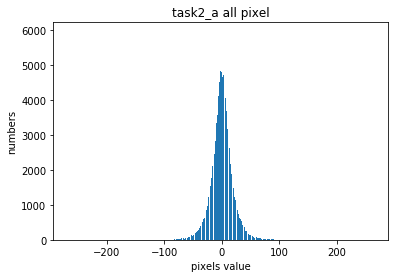

In [13]:
plt.bar(check_all[0],check_all[1],align='center') # A bar chart
plt.title('task2_a all pixel')
plt.xlabel('pixels value')
plt.ylabel('numbers')
plt.savefig("../task2_img/task2_hist_all")

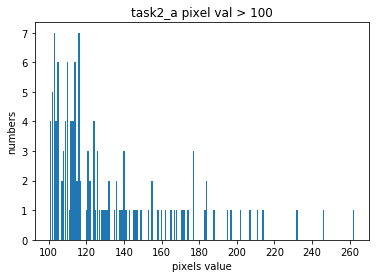

In [14]:
plt.bar(check_greater[0],check_greater[1],align='center') # A bar chart
plt.title('task2_a pixel val > 100')
plt.xlabel('pixels value')
plt.ylabel('numbers')
plt.savefig("../task2_img/task2_hist_100")

In [9]:
cv2.imwrite('../task2_img/res_point.jpg', res_img*255)

True

In [23]:
cv2.namedWindow('res_point.jpg', cv2.WINDOW_NORMAL)
cv2.imshow('res_point.jpg', res_img*255)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Depreciated

In [4]:
def count_pixels_ignore_border(img_gray):
    stat = {}
    for i in range(1, img_gray.shape[0] - 1):
        for j in range(1, img_gray.shape[1] - 1):
            if img_gray[i,j] not in stat:
                stat[img_gray[i,j]] = 0
            stat[img_gray[i,j]] += 1
    return stat